# TPC Digitized Data Exploration

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 16

from readdata import get_data
from tpcplot import draw_g4xyz
from tracklen import process_track, plot_dedx
from recoclusters import digits_to_clusters, pixid2position

In [2]:
data_path = '/media/vitaly/4759e668-4a2d-4997-8dd2-eb4d25313d90/vitaly/CTau/tpcdigidata'
# data_path = 'data'

In [3]:
import glob

In [4]:
def get_keys(files):
    return sorted(list(set(['_'.join(os.path.splitext(os.path.split(item)[-1])[0].split('_')[2:4])
               for item in files])))

In [5]:
files = sorted(glob.glob(f'{data_path}/*.npy'))
keys = get_keys(files)
', '.join(keys)

'K_100.0, K_150.0, K_1500.0, K_200.0, K_250.0, K_300.0, K_400.0, K_500.0, K_600.0, e_100.0, e_150.0, e_1500.0, e_200.0, e_250.0, e_300.0, e_400.0, e_500.0, e_600.0, mu_100.0, mu_150.0, mu_1500.0, mu_200.0, mu_250.0, mu_300.0, mu_400.0, mu_500.0, mu_600.0, p_100.0, p_150.0, p_1500.0, p_200.0, p_250.0, p_300.0, p_400.0, p_500.0, p_600.0, pi_100.0, pi_150.0, pi_1500.0, pi_200.0, pi_250.0, pi_300.0, pi_400.0, pi_500.0, pi_600.0'

In [6]:
def process_hits(digits):
    return np.array([process_track(data) for data in digits.values()])

## Preprocess all tracks

In [ ]:
# for k in keys[31:]:
#     print(k)
#     _, digi = get_data(k, data_path)
#     tracks = process_hits(digi)
#     print(f'{tracks[:, 1].mean():.3f} +- {tracks[:, 1].std():.3f}')
#     np.save(f'tracks/{k}', tracks)

p_250.0


In [7]:
energy = 1500

In [8]:
%%time
pg4, pdigi = get_data('p_1500.0', data_path, 2000)

CPU times: user 20.7 s, sys: 156 ms, total: 20.8 s
Wall time: 21.7 s


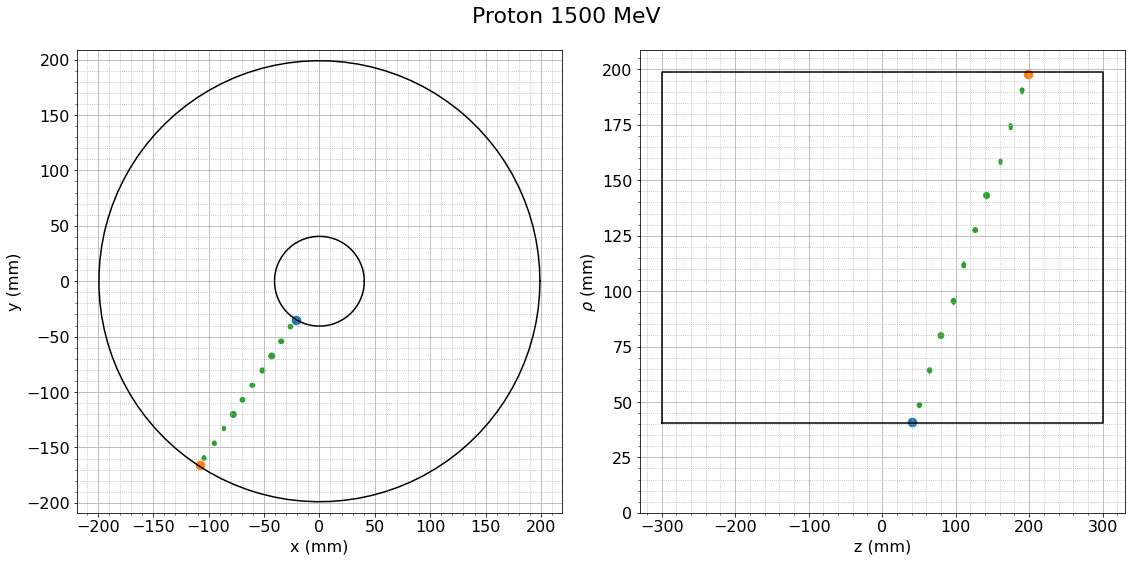

In [13]:
nevt = 812
draw_g4xyz(pg4[nevt], pdigi[nevt], f'Proton {energy} MeV')

In [22]:
%%time
mug4, mudigi = get_data('mu_1500.0', data_path, 2000)

Wall time: 12.9 s


In [7]:
len(mug4)

2000

In [8]:
%%time
pig4, pidigi = get_data('pi_250.0', data_path, 2000)

In [9]:
%%time
k5g4, kddigi = get_data('K_250.0', data_path, 2000)

In [10]:
kg4, kdigi = k5g4, kddigi
list(map(len, [mug4, pig4, kg4]))

[2000, 2000, 2000]

## Event display

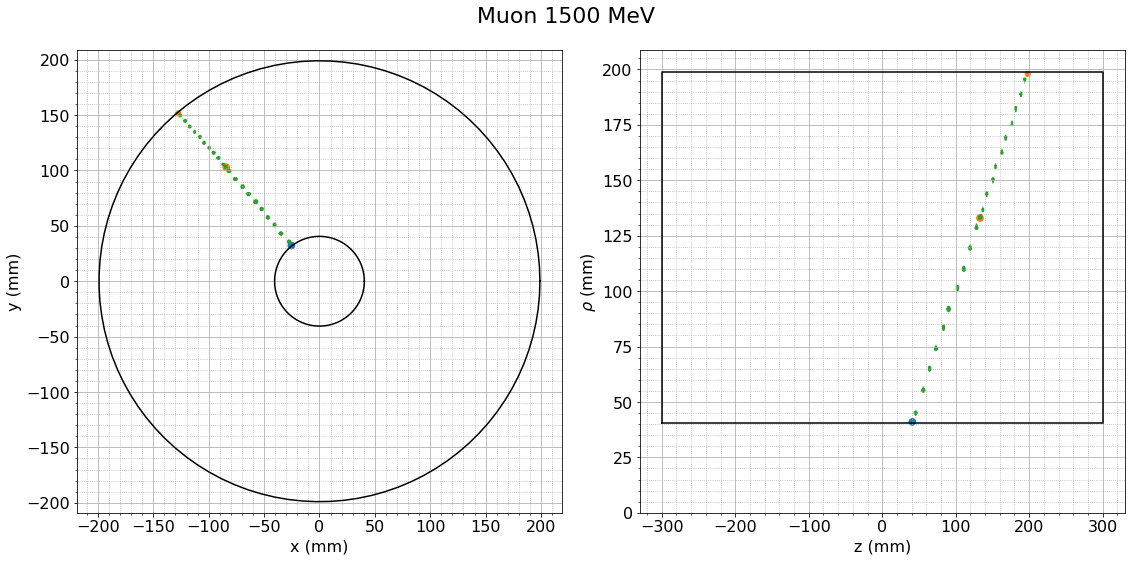

In [34]:
nevt = 46
draw_g4xyz(mug4[nevt], mudigi[nevt], f'Muon {energy} MeV')

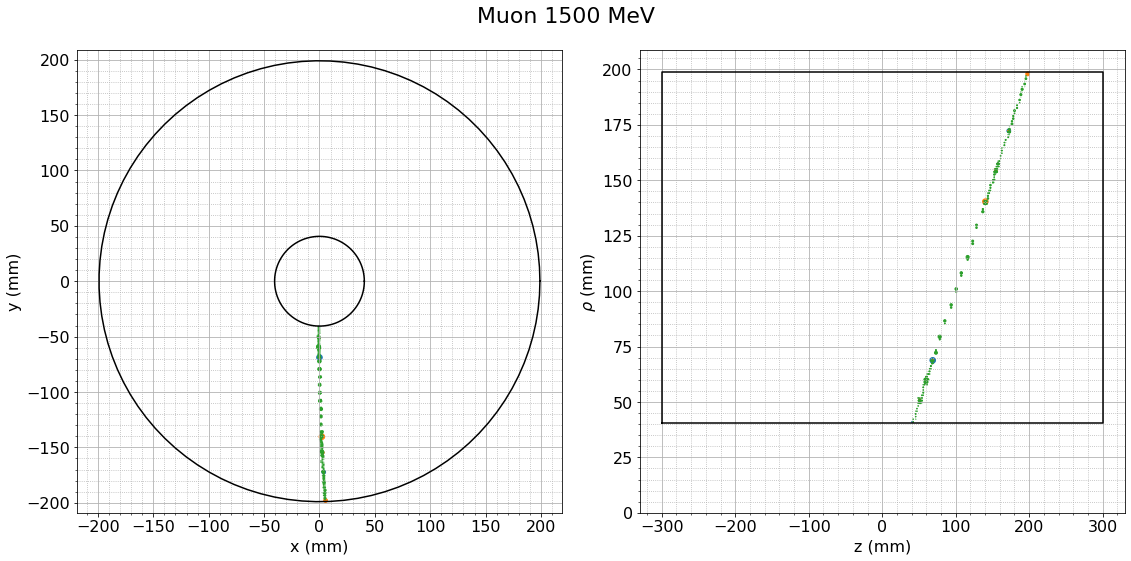

In [29]:
nevt = 117
draw_g4xyz(mug4[nevt], mudigi[nevt], f'Muon {energy} MeV')

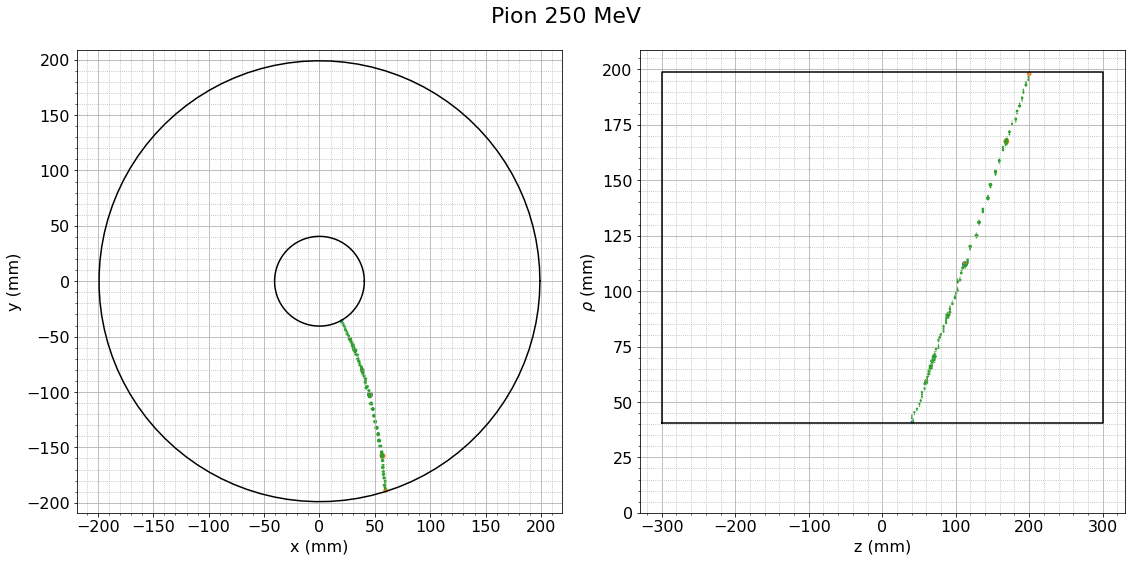

In [12]:
nevt = 51
draw_g4xyz(pig4[nevt], pidigi[nevt], f'Pion {energy} MeV')

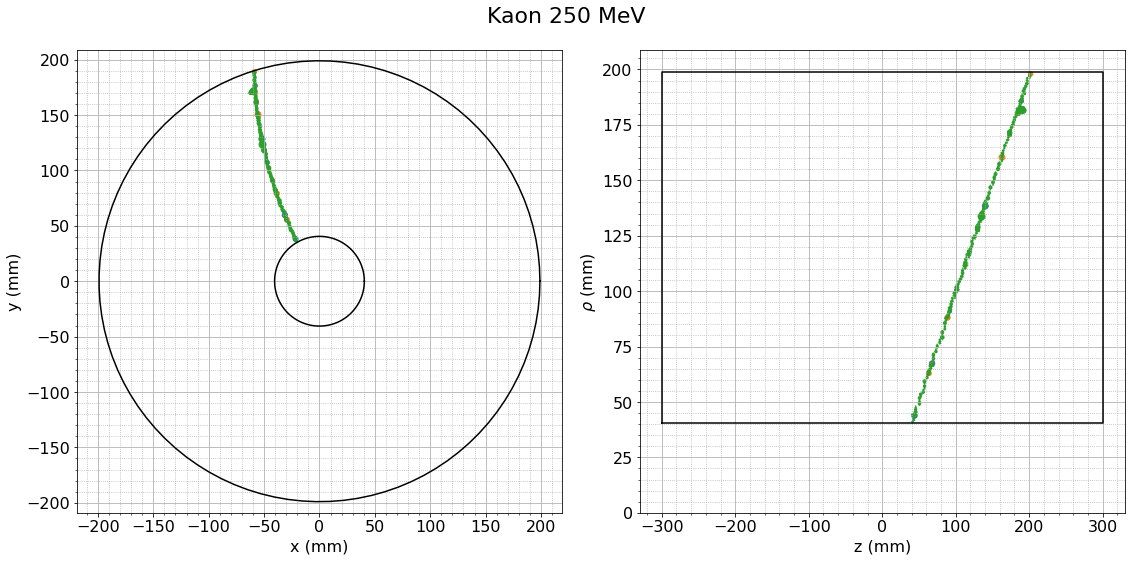

In [13]:
nevt = 51
draw_g4xyz(kg4[nevt], kdigi[nevt], f'Kaon {energy} MeV')

## Track fit

In [14]:
q, l, dEdx = process_track(kdigi[nevt])
q, l, dEdx

(254.45891311812633, 240.91162591255792, 1.0562334306376961)

In [15]:
q, l, dEdx = process_track(pidigi[nevt])
q, l, dEdx

(54.24461053270644, 231.45297202989795, 0.23436558216111128)

In [32]:
q, l, dEdx = process_track(mudigi[54])
q, l, dEdx

(54.74340017767985, 224.80418148848776, 0.24351593380162845)

In [31]:
def process_hits(digits):
    lengths, values, charge = [], [], []
    for evtn, digits in digits.items():
        q, l, dEdx = process_track(digits)
        if l < 250 and l > 210:
            values.append(dEdx)
            lengths.append(l)
            charge.append(q)
    print(f'{np.mean(values):.3f} +- {np.std(values):.3f}')
    return lengths, values, charge

In [27]:
kl, kv, kc = process_hits(kdigi)

0.834 +- 0.137


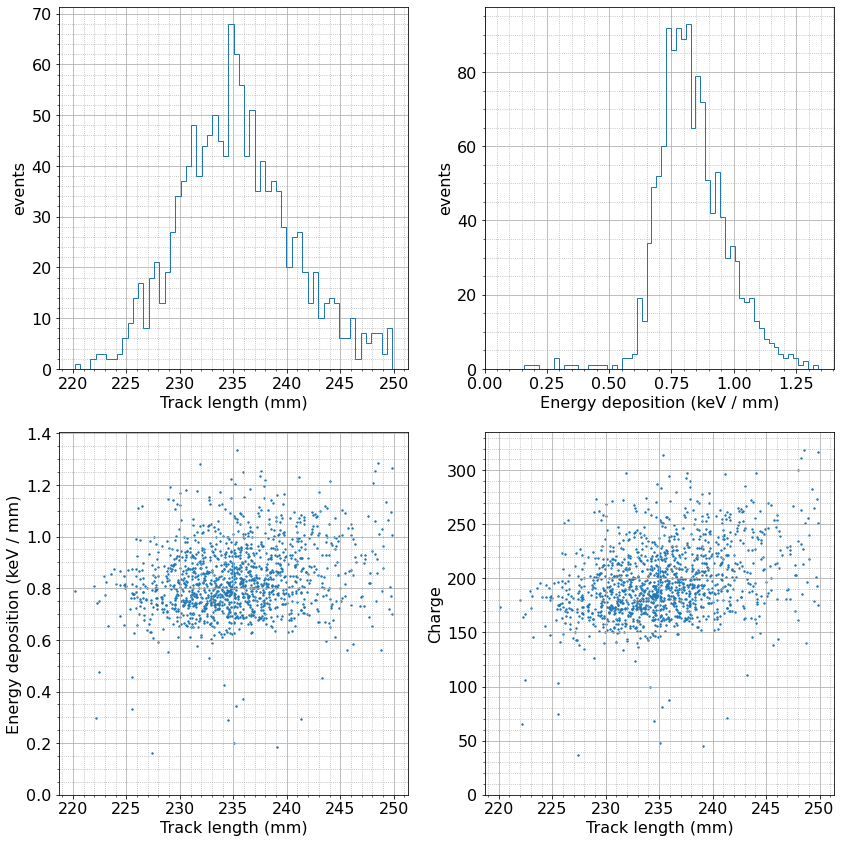

In [28]:
plot_dedx(kl, kv, kc)

In [36]:
pil, piv, pic = process_hits(pidigi)

0.257 +- 0.075


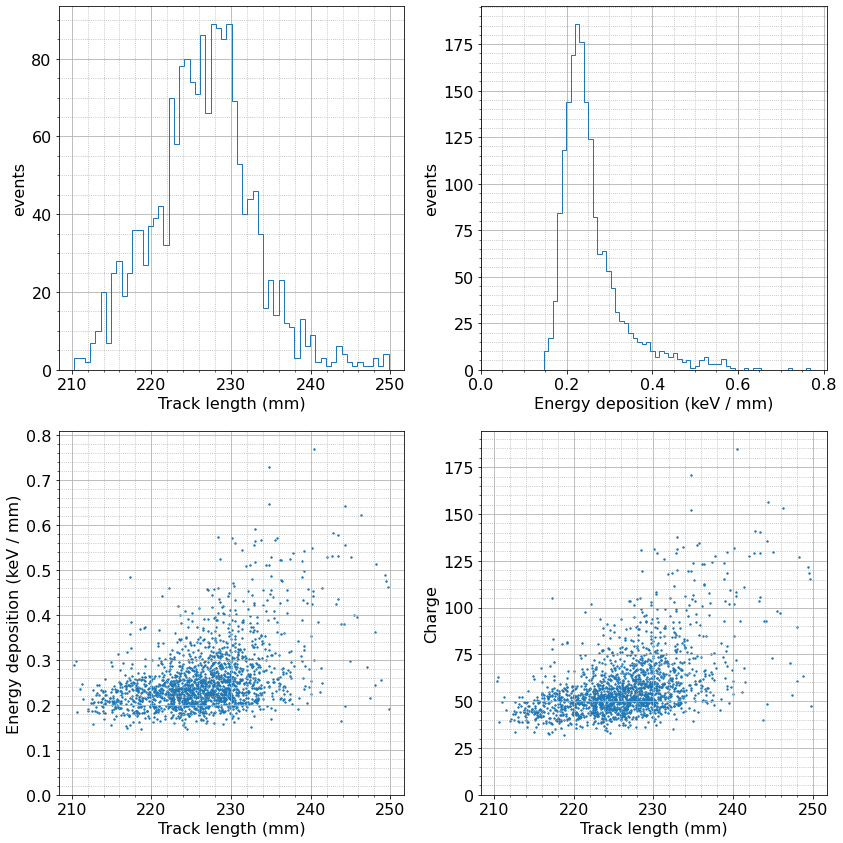

In [33]:
plot_dedx(pil, piv, pic)

In [40]:
mul, muv, muc = process_hits(mudigi)

0.236 +- 0.065


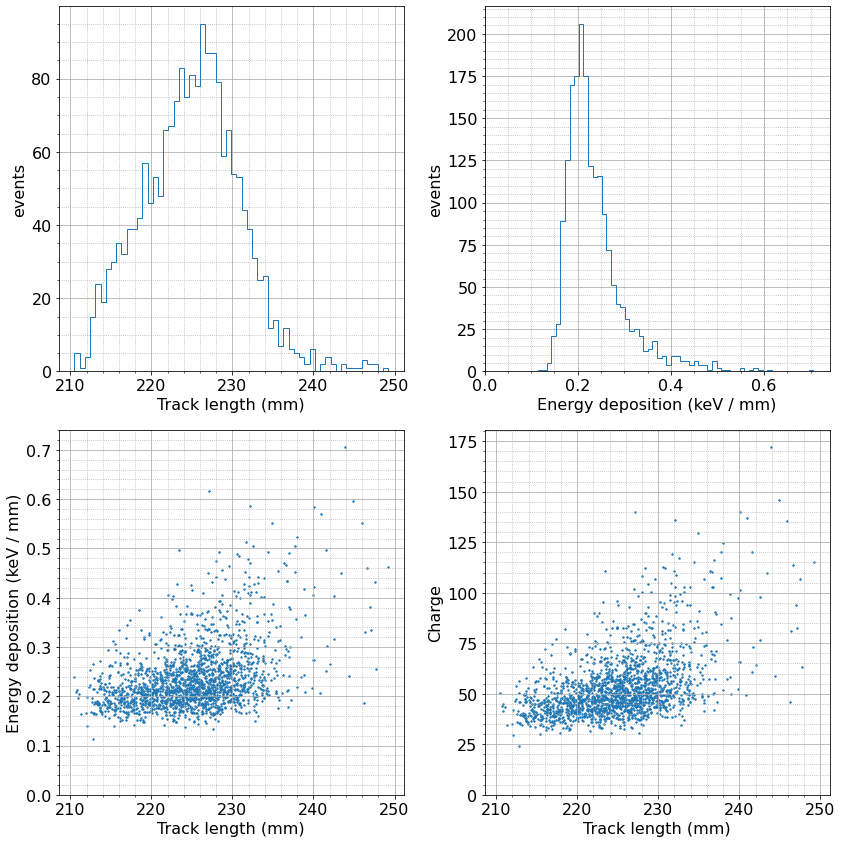

In [37]:
plot_dedx(mul, miv, muc)

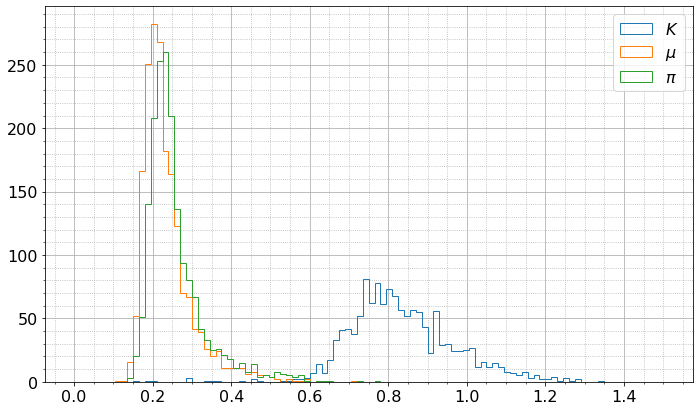

In [41]:
plt.figure(figsize=(10, 6))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.hist(kv, bins=100, range=(0, 1.5), histtype='step', label='$K$')
plt.hist(muv, bins=100, range=(0, 1.5), histtype='step', label=r'$\mu$')
plt.hist(piv, bins=100, range=(0, 1.5), histtype='step', label=r'$\pi$')
plt.legend()
plt.tight_layout()